In [17]:
# Importing necessary libraries
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations and handling arrays
import sklearn              # For machine learning algorithms and tools
import matplotlib.pyplot as pyplot  # For plotting and data visualization
import pickle               # For serializing and deserializing Python objects
from sklearn import linear_model    # For linear regression model
from sklearn.utils import shuffle   # For shuffling datasets to randomize order
from matplotlib import style        # For customizing the style of plots

In [18]:
# Define data variable as the imported big data file, in this case forest-fires.csv
data = pd.read_csv("forest-fires.csv", sep=",")

# Prints the first 5 rows from the data set
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [19]:
# Refine the data set to only a certain number of data points not all columns
data = data[["rain", "temp", "wind", "DC"]]

# Print the first 5 lines of the refined data
print(data.head())

   rain  temp  wind     DC
0   0.0   8.2   6.7   94.3
1   0.0  18.0   0.9  669.1
2   0.0  14.6   1.3  686.9
3   0.2   8.3   4.0   77.5
4   0.0  11.4   1.8  102.2


In [20]:
# Define a variable called predict and set it equal to the desired column
predict = "DC";
# X-axis
x = np.array(data.drop(predict, axis = 1))
# Y-axis
y = np.array(data[predict])

In [21]:
# This trains the model, splits the data, and shows the trends you want to see in the model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [22]:
# Initialize a linear regression model
linear = linear_model.LinearRegression()

# Train the model using the training data
linear.fit(x_train, y_train)

# Evaluate the model's accuracy on the test data
acc = linear.score(x_test, y_test)

# Print the accuracy of the model
print(acc)


0.12930095907583317


In [23]:
# Save the trained linear regression model to a file using the pickle library we imported earlier
with open("forest-fires.pickle", "wb") as f:
    pickle.dump(linear, f)  
# Load the saved model from the file
pickle_in = open("forest-fires.pickle", "rb")  # Open the file in read-binary mode
linear = pickle.load(pickle_in)  # Deserialize the model and load it back into the 'linear' variable


In [24]:
# Prints the coefficients of the linear regression model
print('Coefficient: \n', linear.coef_)  # returns the slope for the feature in the model

# Prints the intercept of the linear regression model
print('Intercept: \n', linear.intercept_)  # returns the y-intercept of the model

coefficient: 
 [  5.7978508   21.26291422 -13.73771138]
Intercept: 
 202.79413398125575


In [25]:
# Generate predictions using the test data
predictions = linear.predict(x_test)

# Loop through each prediction and its corresponding test data
for x in range(len(predictions)):
    # Print the predicted value, the input features, and the actual value
    print(predictions[x], x_test[x], y_test[x])

638.1328171403318 [ 0.  22.8  3.6] 704.4
702.8053495014835 [ 0.  26.1  4. ] 423.4
563.4149822341117 [ 0.  17.8  1.3] 704.4
720.2705660082125 [ 0.  25.5  1.8] 672.6
672.6434613113918 [ 0.  24.1  3.1] 495.6
616.0822863491805 [ 0.  20.6  1.8] 706.8
655.6331299384887 [ 0.  23.3  3.1] 366.7
407.5835733384871 [ 0.  14.8  8. ] 368.3
275.7184089070595 [0.  7.5 6.3] 58.3
438.2614235087193 [ 0.  13.4  3.6] 309.9
728.381923407153 [ 0.  25.3  0.9] 474.9
758.0889264634189 [ 0.  28.7  4. ] 605.8
643.7240748301481 [ 0.  21.9  1.8] 699.6
462.92822714673713 [ 0.  15.4  4.9] 744.4
626.1626851856767 [ 0.  23.4  5.4] 690.0
466.69082856470925 [ 0.  15.9  5.4] 812.1
510.94914013106893 [ 0.  17.4  4.5] 745.3
515.595531261806 [ 0.  18.2  5.4] 752.6
628.7789580325432 [ 0.  23.2  4.9] 685.2
545.3636111643866 [ 0.  19.6  5.4] 668.0
611.8297035059546 [ 0.  20.4  1.8] 764.0
436.2313052248489 [ 0.  12.4  2.2] 48.3
597.3394718421755 [ 0.  20.3  2.7] 698.6
373.2301791514842 [ 0.  10.6  4. ] 86.6
562.8639239625434 [ 0

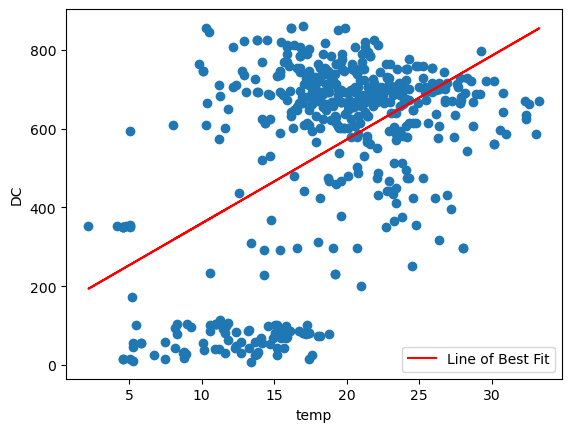

In [26]:

# Create the scatter plot with x and y labels
p = "temp"
pyplot.scatter(data[p], data["DC"])
pyplot.xlabel(p)
pyplot.ylabel("DC")

# Calculate the line of best fit
slope, intercept = np.polyfit(data[p], data["DC"], 1)
best_fit_line = np.array(data[p]) * slope + intercept

# Plot the line of best fit
pyplot.plot(data[p], best_fit_line, color='red', label='Line of Best Fit')

# Display the plot
pyplot.legend()
pyplot.show()